# Project Title :- Heart Diseases 

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.


•	Slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

•	Thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

•	Resting_blood_pressure (type: int): resting blood pressure

•	Chest_pain_type (type: int): chest pain type (4 values)

•	Num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

•	Fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

•	Resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

•	Serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

•	Oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

•	Sex (type: binary): 0: female, 1: male

•	Age (type: int): age in years

•	Max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

•	Exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


Our goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

0 represents no heart disease present
1 represents heart disease present

We will try most of regression algorithms.

## Data Loading

In [2]:
import pandas as pd

In [3]:
data1 = pd.read_csv('values.csv')
data2 = pd.read_csv('labels.csv')
data = pd.merge(data1,data2,how= 'outer')
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [4]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


## Data Info

In [5]:
data.shape

(180, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [8]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

###  There is no null values .

## EDA Part

In [9]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [10]:
for col in ['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']:
    print(col ,len(data[col].unique()))
    print('*'*30)

patient_id 180
******************************
slope_of_peak_exercise_st_segment 3
******************************
thal 3
******************************
resting_blood_pressure 36
******************************
chest_pain_type 4
******************************
num_major_vessels 4
******************************
fasting_blood_sugar_gt_120_mg_per_dl 2
******************************
resting_ekg_results 3
******************************
serum_cholesterol_mg_per_dl 118
******************************
oldpeak_eq_st_depression 34
******************************
sex 2
******************************
age 40
******************************
max_heart_rate_achieved 73
******************************
exercise_induced_angina 2
******************************


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

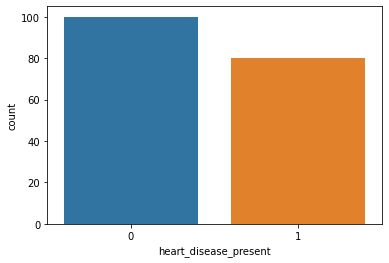

In [12]:
sns.countplot(x = 'heart_disease_present', data = data)
plt.rcParams['figure.figsize']=(5,5)
plt.show()

###  There are more people without heart disease . 

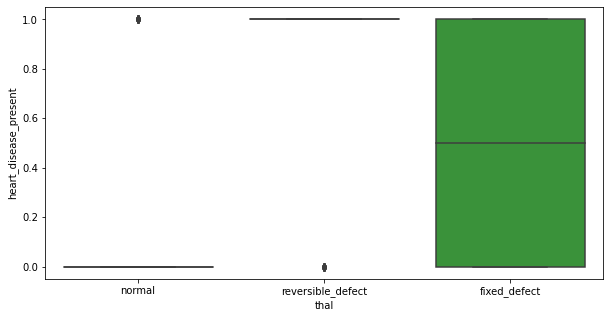

In [13]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x ='thal', y ='heart_disease_present', data=data)

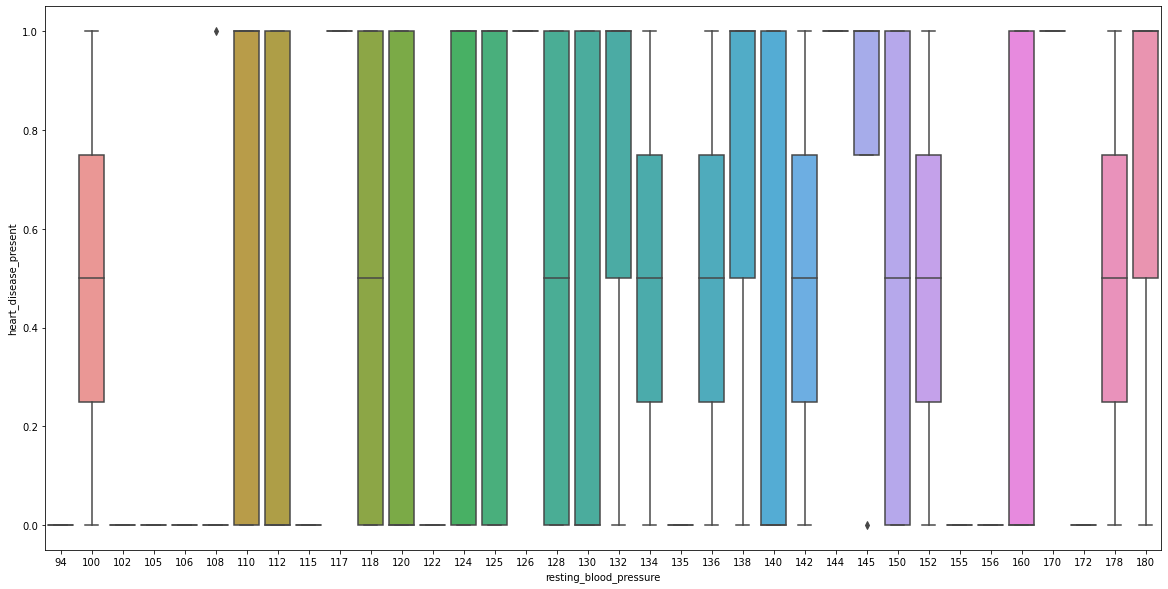

In [14]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x ='resting_blood_pressure', y ='heart_disease_present', data=data)

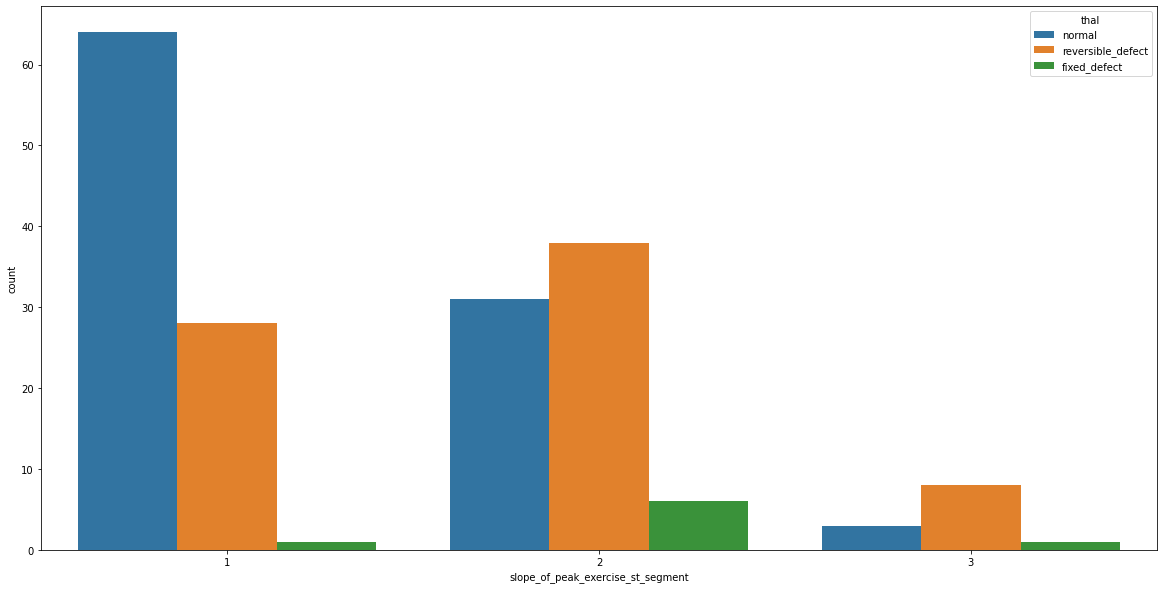

In [15]:
sns.countplot( x = 'slope_of_peak_exercise_st_segment' ,hue = 'thal' ,data = data)
plt.show()

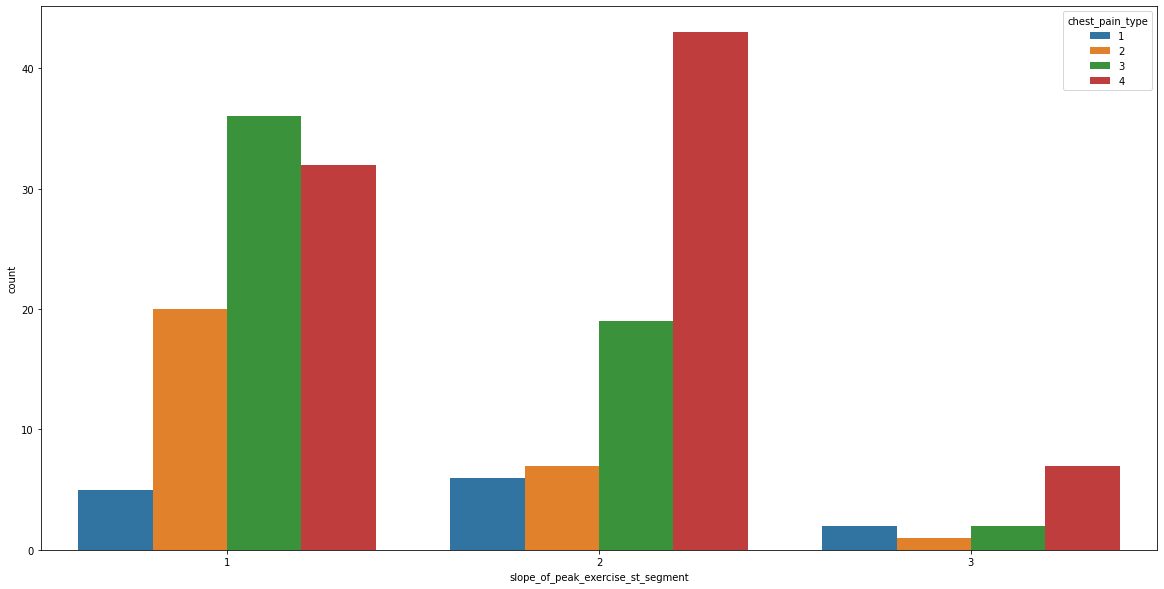

In [16]:
sns.countplot( x = 'slope_of_peak_exercise_st_segment' ,hue = 'chest_pain_type' ,data = data)
plt.show()

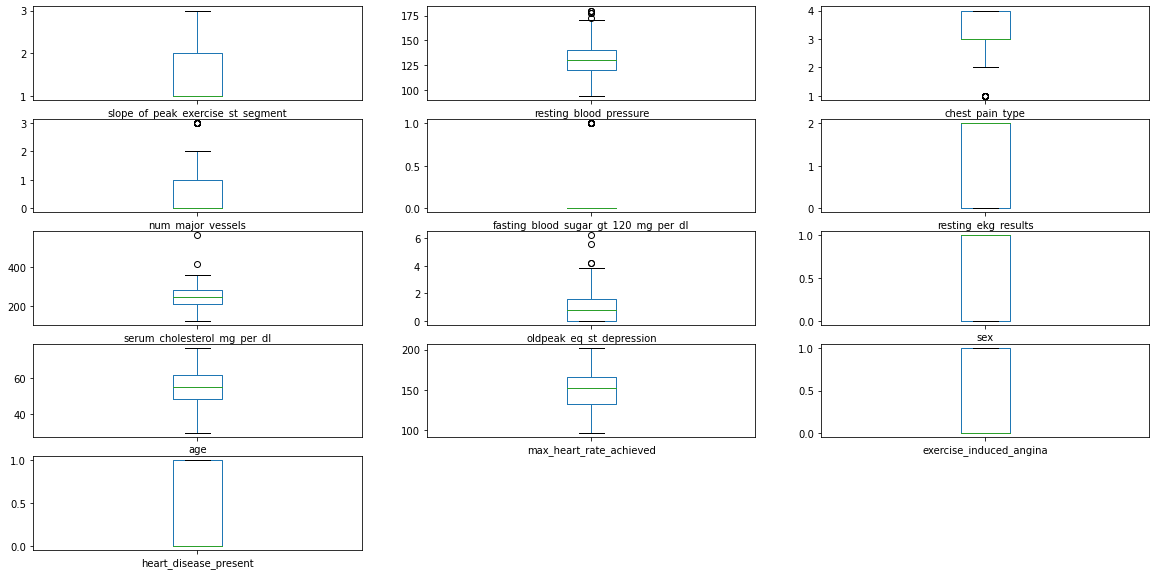

In [17]:
data.plot( kind = 'box', subplots = True,layout = (5,3))
plt.rcParams['figure.figsize']=(10,10)
plt.show()

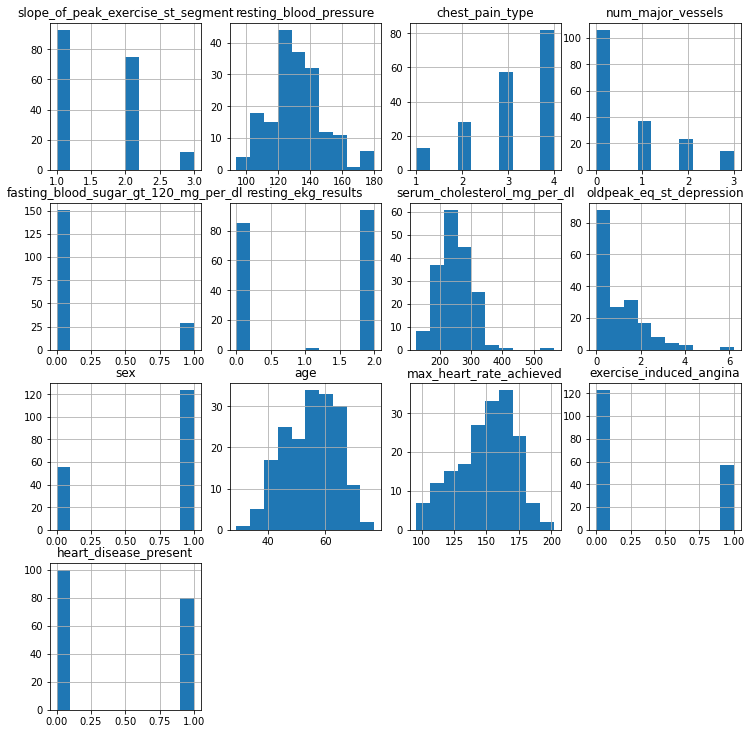

<Figure size 0x0 with 0 Axes>

In [18]:
data.hist()
plt.tight_layout(pad=0)
plt.figure(figsize = (0,0))
plt.show()

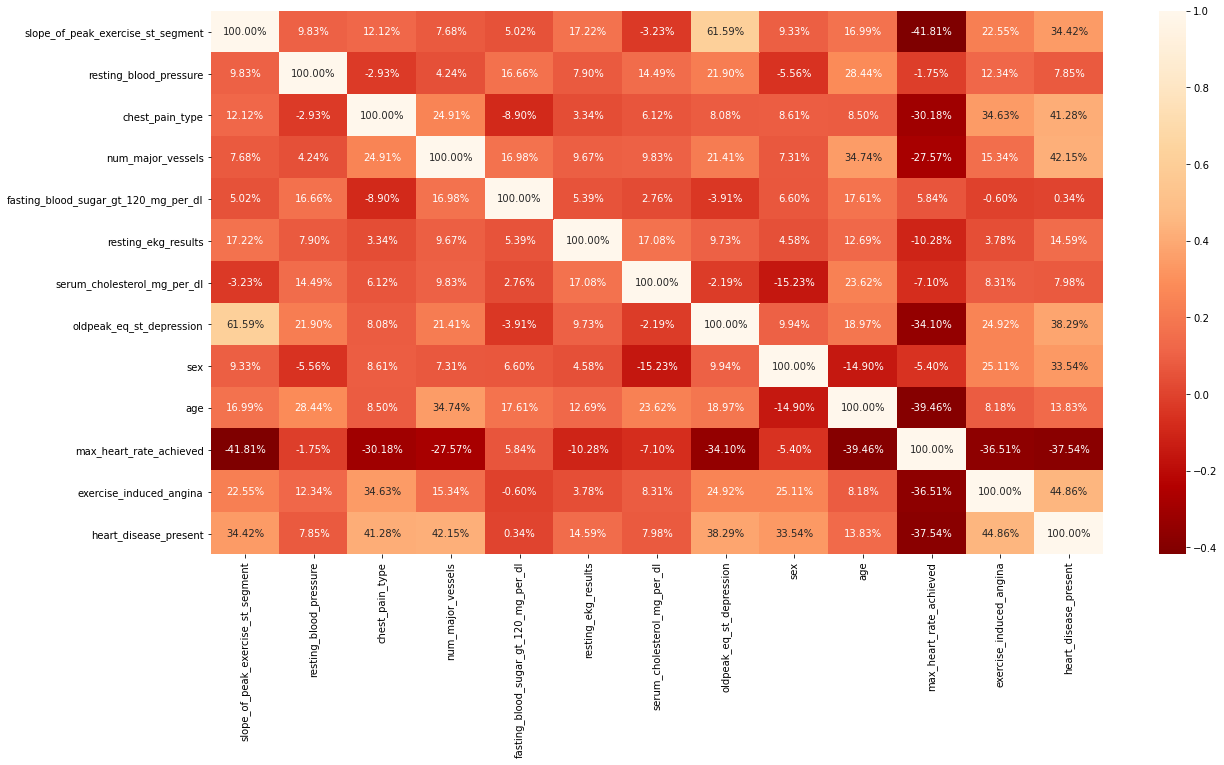

In [19]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.2%', cmap='OrRd_r')

### There is no correlation between the predictors

## Checking For Null Values

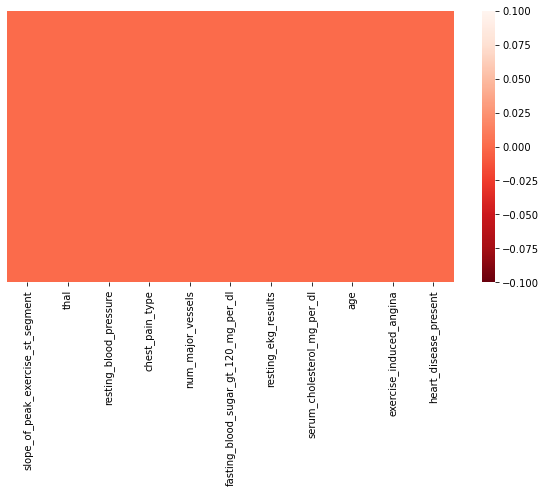

In [119]:
sns.heatmap(data.isnull(), yticklabels=False,cmap= 'Reds_r')
plt.rcParams['figure.figsize']=(10,5)

###  Here we can get to know that , here no null value present .

In [21]:
data = data.drop(["patient_id","sex","oldpeak_eq_st_depression","max_heart_rate_achieved"],axis=1)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,age,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,45,0,0
1,2,normal,110,3,0,0,0,214,54,0,0
2,1,normal,125,4,3,0,2,304,77,1,1
3,1,reversible_defect,152,4,0,0,0,223,40,0,1
4,3,reversible_defect,178,1,0,0,2,270,59,0,0


### Here dropped the unnecessary column .

## Training Data 

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [23]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,age,exercise_induced_angina,heart_disease_present
0,0,1,16,1,0,0,2,101,11,0,0
1,1,1,6,2,0,0,0,33,20,0,0
2,0,1,14,3,3,0,2,99,39,1,1
3,0,2,28,3,0,0,0,41,6,0,1
4,2,2,34,0,0,0,2,78,25,0,0


In [24]:
X = data.drop('heart_disease_present', axis =1)
y = data['heart_disease_present']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [26]:
X_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,age,exercise_induced_angina
86,0,1,7,2,0,0,2,76,7,1
172,1,2,10,3,0,0,0,38,5,0
175,1,2,14,3,2,1,0,65,33,0
147,1,1,19,0,2,0,0,52,27,0
158,0,1,11,2,0,0,0,44,10,0


In [27]:
X_test.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,age,exercise_induced_angina
91,1,1,1,3,2,0,2,95,33,1
108,0,1,14,0,1,0,2,32,17,1
68,1,1,20,1,0,0,2,62,21,0
129,2,1,11,3,1,0,2,59,30,1
165,0,1,28,2,1,0,0,84,33,0


In [28]:
y_train.head()

86     0
172    1
175    1
147    1
158    0
Name: heart_disease_present, dtype: int64

In [29]:
y_test.head()

91     1
108    0
68     0
129    1
165    0
Name: heart_disease_present, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   slope_of_peak_exercise_st_segment     180 non-null    int64
 1   thal                                  180 non-null    int32
 2   resting_blood_pressure                180 non-null    int64
 3   chest_pain_type                       180 non-null    int64
 4   num_major_vessels                     180 non-null    int64
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64
 6   resting_ekg_results                   180 non-null    int64
 7   serum_cholesterol_mg_per_dl           180 non-null    int64
 8   age                                   180 non-null    int64
 9   exercise_induced_angina               180 non-null    int64
 10  heart_disease_present                 180 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 20.2 KB


## Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
lg_model = LogisticRegression(max_iter=3000)
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

### Here we can see that the accuracy score is very less . So we have to use Scaler  . 

## Scaling the Data 

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
X = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns = (data.drop(['heart_disease_present'], axis= 1)).columns

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

## Again Logistic Regression

In [36]:
LR_model = LogisticRegression(max_iter=3000)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8611111111111112

In [37]:
confusion_matrix(y_pred,y_test)

array([[20,  3],
       [ 2, 11]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.85      0.79      0.81        14

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36



## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7777777777777778

In [41]:
dt_model = DecisionTreeClassifier(max_depth = 10,random_state= 10,max_features= None,min_samples_leaf=15)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8055555555555556

In [42]:
confusion_matrix(y_pred,y_test)

array([[19,  4],
       [ 3, 10]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.77      0.71      0.74        14

    accuracy                           0.81        36
   macro avg       0.80      0.79      0.79        36
weighted avg       0.80      0.81      0.80        36



##  Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier(random_state= 20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8611111111111112

In [118]:
rf_model = RandomForestClassifier(random_state= 40)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9166666666666666

In [113]:
rf_model = RandomForestClassifier(random_state= 60)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9444444444444444

In [46]:
confusion_matrix(y_test,y_pred)

array([[21,  1],
       [ 4, 10]], dtype=int64)

In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.71      0.91      0.80        11

    accuracy                           0.86        36
   macro avg       0.83      0.87      0.85        36
weighted avg       0.88      0.86      0.87        36



## XGB  (XGBoost)

In [48]:
from xgboost import XGBClassifier

In [77]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
accuracy_score(y_pred,y_test)

[17:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sambit\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8888888888888888

In [50]:
confusion_matrix(y_pred,y_test)

array([[20,  2],
       [ 2, 12]], dtype=int64)

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.86      0.86      0.86        14

    accuracy                           0.89        36
   macro avg       0.88      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36



## SVM  (Support Vector Machine)

In [52]:
from sklearn.svm import SVC   

In [116]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9166666666666666

In [54]:
confusion_matrix(y_pred,y_test)

array([[22,  3],
       [ 0, 11]], dtype=int64)

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.89      0.94      0.91        36
weighted avg       0.93      0.92      0.92        36



## NB Classifier  (Naive Bayes)

In [56]:
from sklearn.naive_bayes import BernoulliNB

In [78]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

In [58]:
confusion_matrix(y_pred,y_test)

array([[20,  4],
       [ 2, 10]], dtype=int64)

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.71      0.83      0.77        12

    accuracy                           0.83        36
   macro avg       0.81      0.83      0.82        36
weighted avg       0.84      0.83      0.84        36



## KNN  (K-Nearest Neighbours)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8055555555555556

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8055555555555556

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=20,metric='euclidean')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8611111111111112

In [64]:
confusion_matrix(y_pred,y_test)

array([[22,  5],
       [ 0,  9]], dtype=int64)

In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        27
           1       0.64      1.00      0.78         9

    accuracy                           0.86        36
   macro avg       0.82      0.91      0.84        36
weighted avg       0.91      0.86      0.87        36



## SGD (Stochastic Gradient Descent)

In [66]:
from sklearn.linear_model import SGDClassifier

In [73]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

In [68]:
sgd_model = SGDClassifier(loss= 'modified_huber', shuffle= True , random_state=10)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8055555555555556

In [69]:
sgd_model = SGDClassifier(loss= 'modified_huber', shuffle= True , random_state=30)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.75

In [70]:
sgd_model = SGDClassifier(loss= 'modified_huber', shuffle= True , random_state=50)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8611111111111112

In [71]:
confusion_matrix(y_pred,y_test)

array([[20,  3],
       [ 2, 11]], dtype=int64)

In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.79      0.85      0.81        13

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.85        36
weighted avg       0.86      0.86      0.86        36



### After trying all possible algorithms, RANDOM FOREST classifier gets better accuracy score to this dataset .